In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip '/content/credit score.zip'

Archive:  /content/credit score.zip
  inflating: test.csv                
  inflating: train.csv               


In [178]:
train_data=pd.read_csv('train.csv')


<ipython-input-178-75fa2f613baa>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data=pd.read_csv('train.csv')


In [179]:
train_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


**Train Data EDA**

In [180]:
train_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [181]:
train_data.shape

(100000, 28)

In [182]:
train_data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [183]:
train_data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [184]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [185]:
train_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [186]:
train_data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

**Count Plots**

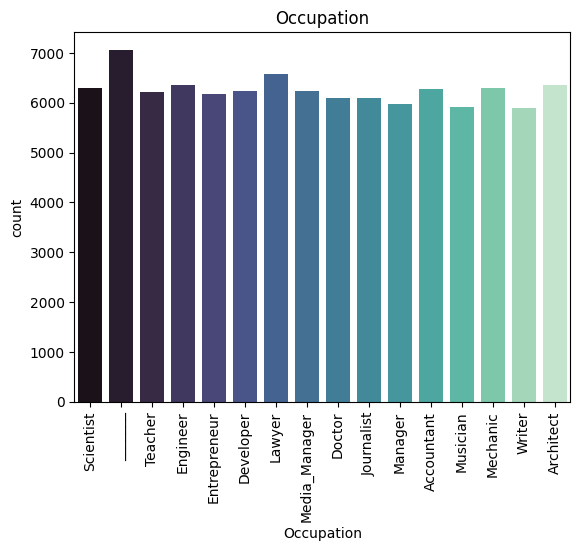

In [187]:
sns.countplot(x=train_data['Occupation'],palette='mako')
plt.title('Occupation')
plt.xticks(rotation=90)
plt.show()

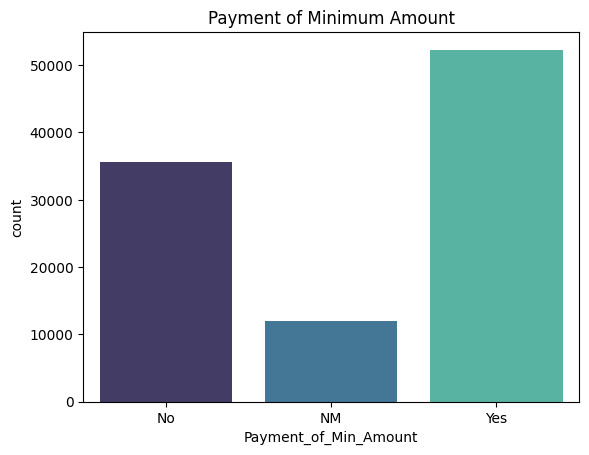

In [188]:
sns.countplot(x=train_data['Payment_of_Min_Amount'],palette='mako')
plt.title('Payment of Minimum Amount')
plt.show()

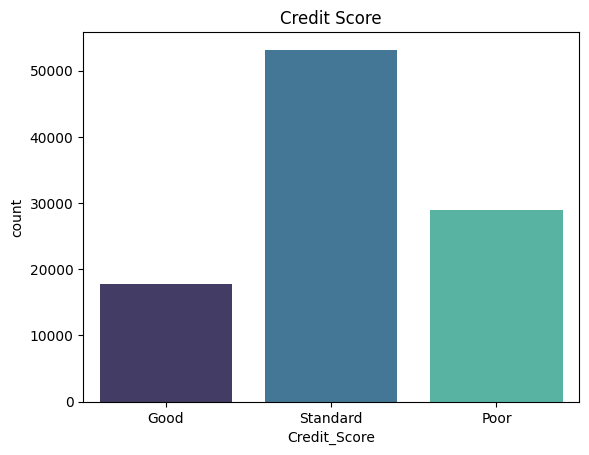

In [189]:
sns.countplot(x=train_data['Credit_Score'],palette='mako')
plt.title('Credit Score')
plt.show()

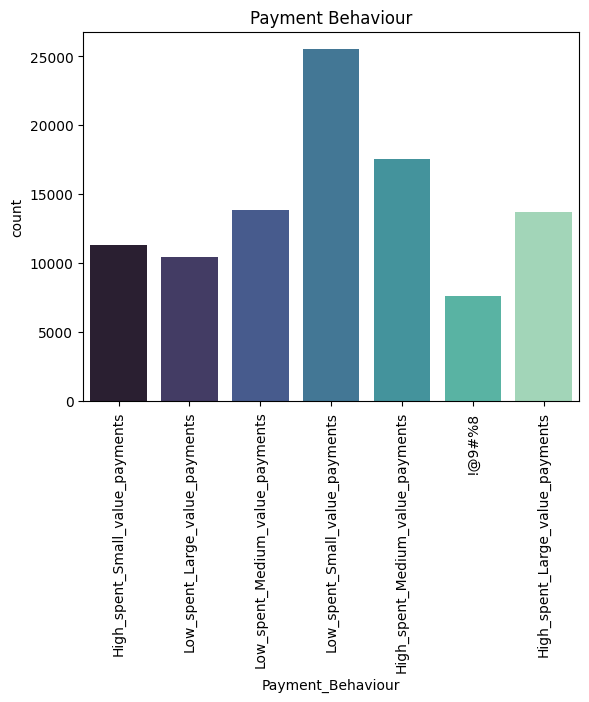

In [190]:
sns.countplot(x=train_data['Payment_Behaviour'],palette='mako')
plt.title('Payment Behaviour')
plt.xticks(rotation=90)
plt.show()

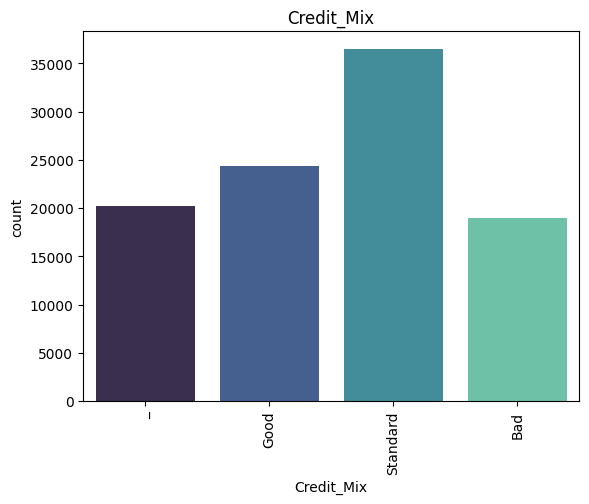

In [191]:
sns.countplot(x=train_data['Credit_Mix'],palette='mako')
plt.title('Credit_Mix')
plt.xticks(rotation=90)
plt.show()

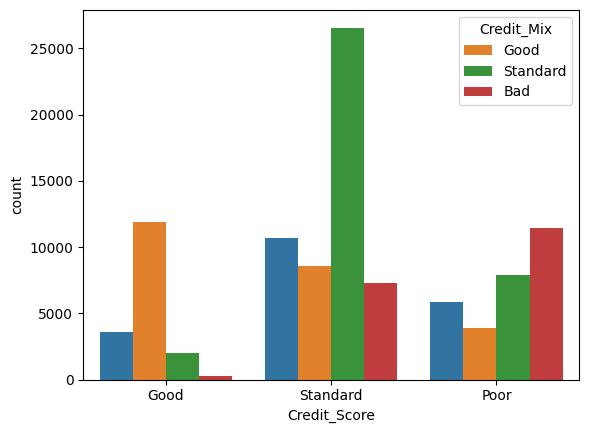

In [192]:
sns.countplot(data=train_data,x='Credit_Score',hue='Credit_Mix')
plt.show()


<Figure size 2000x2000 with 0 Axes>

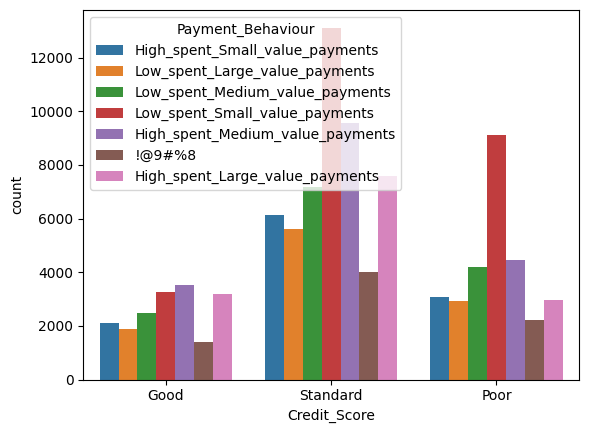

<Figure size 2000x2000 with 0 Axes>

In [194]:
sns.countplot(data=train_data,x='Credit_Score',hue='Payment_Behaviour')
plt.figure(figsize=(20,20))

<Axes: xlabel='Payment_of_Min_Amount', ylabel='count'>

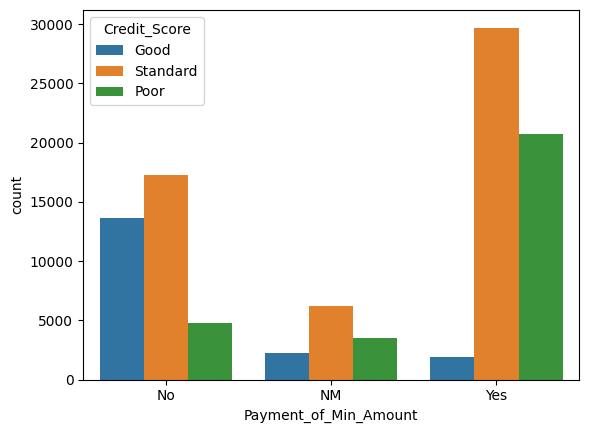

In [193]:
sns.countplot(data=train_data,x='Payment_of_Min_Amount',hue='Credit_Score')


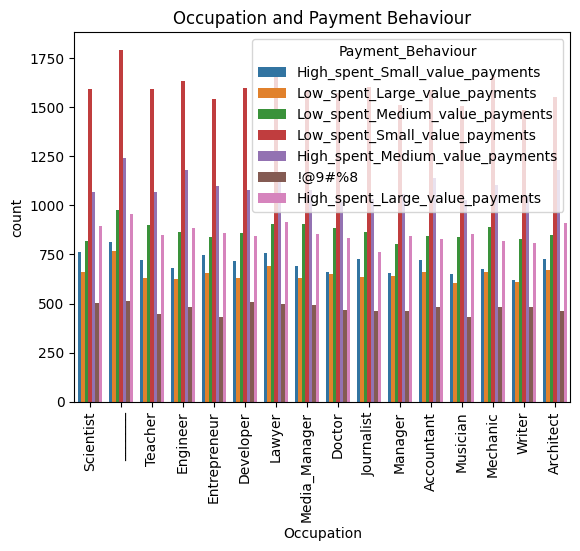

In [195]:
sns.countplot(data=train_data,x='Occupation',hue='Payment_Behaviour')
plt.title('Occupation and Payment Behaviour')
plt.xticks(rotation=90)
plt.show()


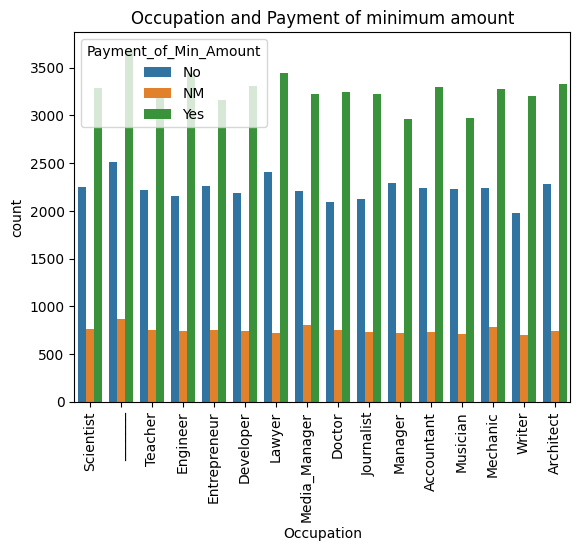

In [196]:
sns.countplot(data=train_data,x='Occupation',hue='Payment_of_Min_Amount')
plt.title('Occupation and Payment of minimum amount')
plt.xticks(rotation=90)
plt.show()

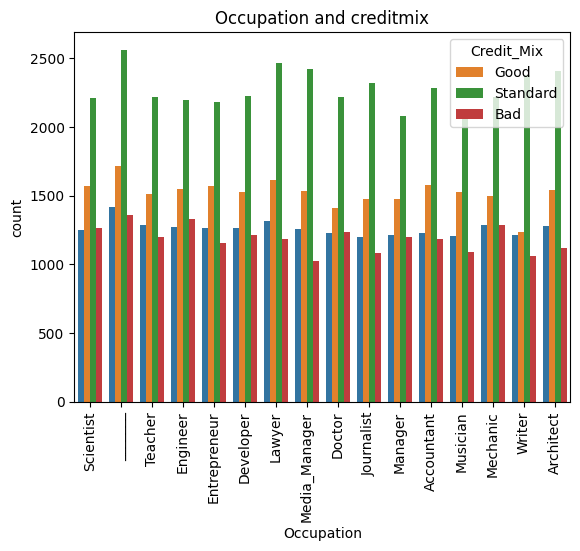

In [197]:
sns.countplot(data=train_data,x='Occupation',hue='Credit_Mix')
plt.title('Occupation and creditmix')
plt.xticks(rotation=90)
plt.show()

**Bar Graph**

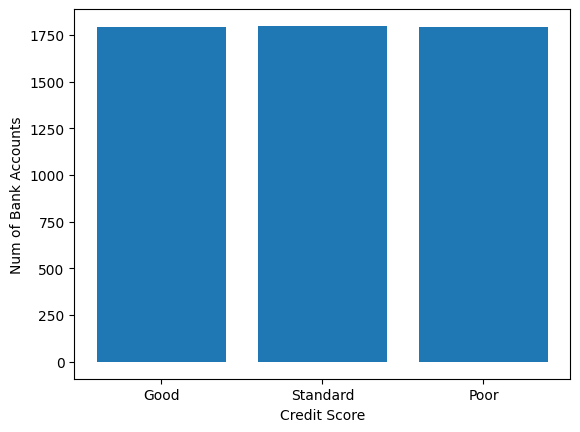

In [ ]:
plt.bar(train_data['Credit_Score'],train_data['Num_Bank_Accounts'])
plt.xlabel('Credit Score')
plt.ylabel('Num of Bank Accounts')
plt.show()


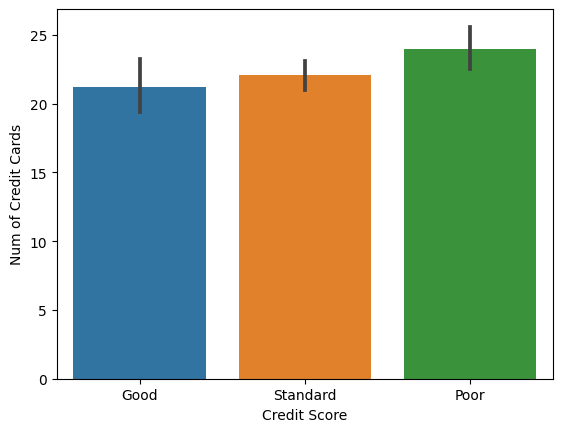

In [ ]:
sns.barplot(x=train_data['Credit_Score'],y=train_data['Num_Credit_Card'])
plt.xlabel('Credit Score')
plt.ylabel('Num of Credit Cards')
plt.show()

**Histogram**

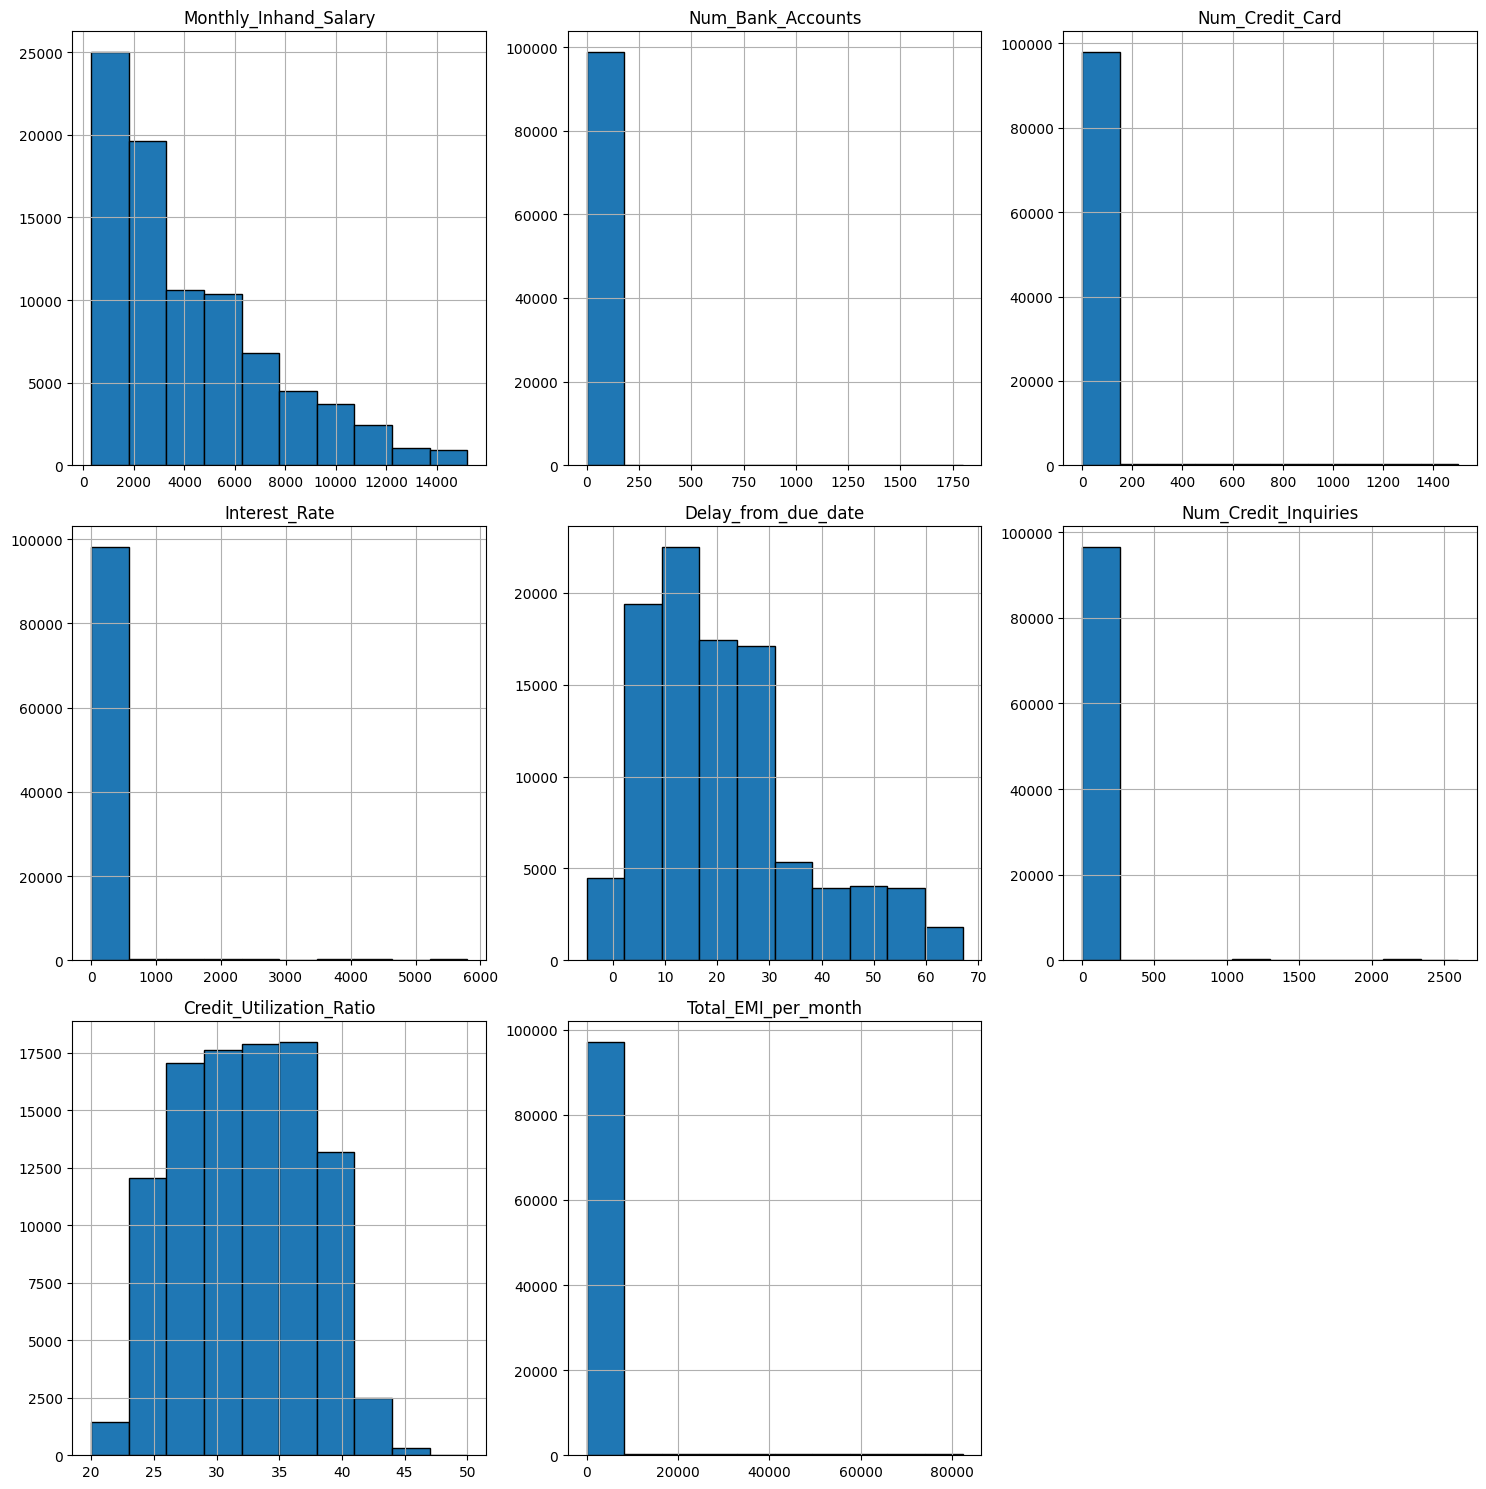

In [ ]:
train_data.hist(figsize=(15,15),edgecolor='black')
plt.tight_layout()
plt.show()

**Data Preprocessing**

**Converting Objects to float**

In [ ]:
train_data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [ ]:
train_data['Age']=train_data['Age'].str.replace(r'\D','')
train_data['Annual_Income']=train_data['Annual_Income'].str.replace(r'\D','')
train_data['Num_of_Loan']=train_data['Num_of_Loan'].str.replace(r'\D','')
train_data['Num_of_Delayed_Payment']=train_data['Num_of_Delayed_Payment'].str.replace(r'\D','')
train_data['Changed_Credit_Limit']=train_data['Changed_Credit_Limit'].str.replace(r'\D','')
train_data['Amount_invested_monthly']=train_data['Amount_invested_monthly'].str.replace(r'\D','')
train_data['Outstanding_Debt']=train_data['Outstanding_Debt'].str.replace(r'\D','')
train_data['Monthly_Balance']=train_data['Monthly_Balance'].str.replace(r'\D','')

<ipython-input-93-290a42c24d11>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['Age']=train_data['Age'].str.replace(r'\D','')
<ipython-input-93-290a42c24d11>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['Annual_Income']=train_data['Annual_Income'].str.replace(r'\D','')
<ipython-input-93-290a42c24d11>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['Num_of_Loan']=train_data['Num_of_Loan'].str.replace(r'\D','')
<ipython-input-93-290a42c24d11>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['Num_of_Delayed_Payment']=train_data['Num_of_Delayed_Payment'].str.replace(r'\D','')
<ipython-input-93-290a42c24d11>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['Changed_Credit_Limit']=trai

In [ ]:
train_data['Age'] = pd.to_numeric(train_data['Age'])
train_data['Annual_Income'] =pd.to_numeric(train_data['Annual_Income'])
train_data['Num_of_Loan'] =pd.to_numeric(train_data['Num_of_Loan'])
train_data['Num_of_Delayed_Payment'] =pd.to_numeric(train_data['Num_of_Delayed_Payment'])
train_data['Changed_Credit_Limit'] = pd.to_numeric(train_data['Changed_Credit_Limit'])
train_data['Amount_invested_monthly'] = pd.to_numeric(train_data['Amount_invested_monthly'])
train_data['Outstanding_Debt'] = pd.to_numeric(train_data['Outstanding_Debt'])

In [ ]:
train_data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           int64
SSN                          object
Occupation                   object
Annual_Income                 int64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt              int64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

**Fixing Unknown Values**

In [ ]:
train_data['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [ ]:
train_data['Occupation'].replace('_______','Others',inplace=True)
train_data['Occupation'].unique()

array(['Scientist', 'Others', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [ ]:
train_data.drop(['ID','Customer_ID','Month','Name','SSN'],axis=1,inplace=True)

In [ ]:
train_data['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [ ]:
train_data['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
train_data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
train_data['Payment_Behaviour'].replace('!@9#%8',np.nan,inplace=True)
train_data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
train_data['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: Payment_Behaviour, dtype: int64

In [ ]:
train_data['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
train_data['Credit_Mix'].replace('_',np.nan,inplace=True)
train_data['Credit_Mix'].value_counts()

Standard    36479
Good        24337
Bad         18989
Name: Credit_Mix, dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  int64  
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   ob

**Missing value Handling**

In [ ]:
train_data.isna().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

In [ ]:
for i in ['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly']:
  train_data[i]=train_data[i].fillna(train_data[i].median())

In [ ]:
for i in ['Type_of_Loan','Payment_Behaviour','Credit_History_Age','Credit_Mix','Monthly_Balance']:
  train_data[i]=train_data[i].fillna(train_data[i].mode)

In [ ]:
train_data.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
train_data.shape

(100000, 23)

**Balancing Data**

In [ ]:
train_data['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
from sklearn.utils import resample
train_data_majority=train_data[(train_data['Credit_Score']=='Standard')]
train_data_minority=train_data[(train_data['Credit_Score']=='Poor')]
train_data_minority2=train_data[train_data['Credit_Score']=='Good']
train_data_minority_unsampled = resample(train_data_minority,replace=True,n_samples=53174,random_state=0)
train_data_minority_unsampled2 = resample(train_data_minority2,replace=True,n_samples=53174,random_state=0)
train_data_unsampled = pd.concat([train_data_minority_unsampled,train_data_minority_unsampled2,train_data_majority])


<Axes: xlabel='Credit_Score', ylabel='count'>

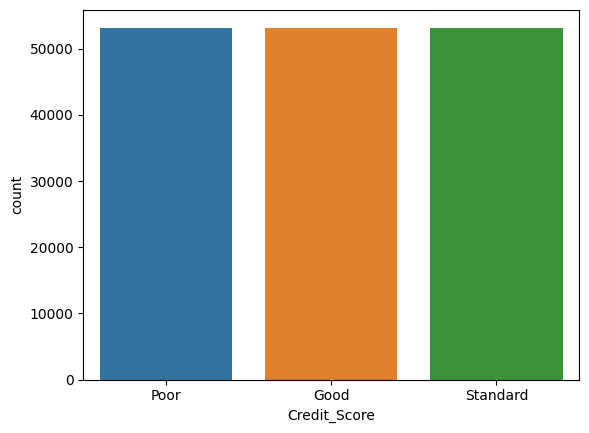

In [ ]:
sns.countplot(x=train_data_unsampled['Credit_Score'])

In [ ]:
train_data_unsampled.shape

(159522, 23)

**Outlier Handling**

In [ ]:
train_data_unsampled.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly
count,159522.000000,1.595220e+05,159522.000000,159522.000000,159522.000000,159522.000000,159522.000000,159522.000000,159522.000000,1.595220e+05,159522.000000,159522.000000,159522.000000,159522.000000,1.595220e+05
mean,122.312352,1.576329e+14,4151.985090,17.065176,22.741340,73.698286,10.929778,20.102230,29.138301,6.360813e+14,27.468525,125421.070793,32.320977,1424.789327,1.186414e+16
std,696.526562,1.164325e+15,3072.008183,118.582849,131.335103,475.931882,63.901069,15.101017,217.709130,4.927452e+15,192.609713,112525.707762,5.128354,8386.099519,1.226101e+16
min,14.000000,7.046500e+04,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,0.000000e+00,0.000000,12.000000,20.000000,0.000000,0.000000e+00
25%,25.000000,1.861310e+06,1855.807500,3.000000,4.000000,7.000000,2.000000,9.000000,8.000000,3.760000e+02,3.000000,39256.000000,28.093008,29.941931,3.480249e+15
50%,34.000000,3.937907e+06,3093.745000,5.000000,5.000000,12.000000,3.000000,16.000000,14.000000,8.610000e+02,5.000000,100297.000000,32.351216,69.392147,8.162033e+15
75%,43.000000,8.578295e+06,5562.481667,7.000000,7.000000,20.000000,5.000000,27.000000,18.000000,1.339000e+03,8.000000,167693.000000,36.528617,164.456949,1.533885e+16
max,8698.000000,1.349284e+16,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,7.970000e+16,2597.000000,499807.000000,50.000000,82331.000000,6.399602e+16


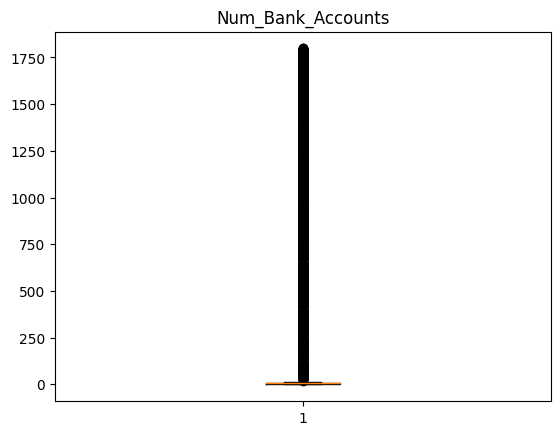

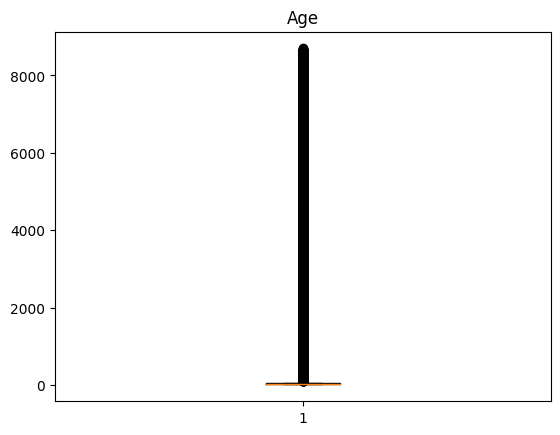

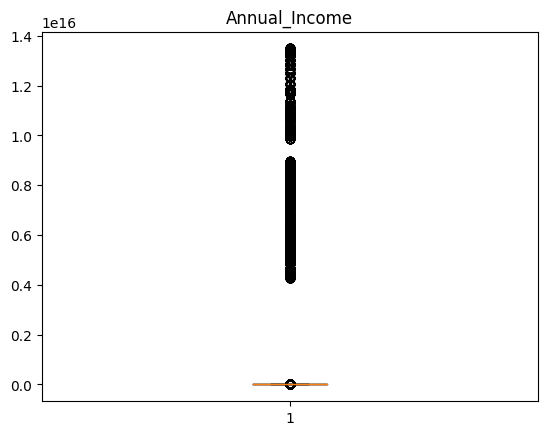

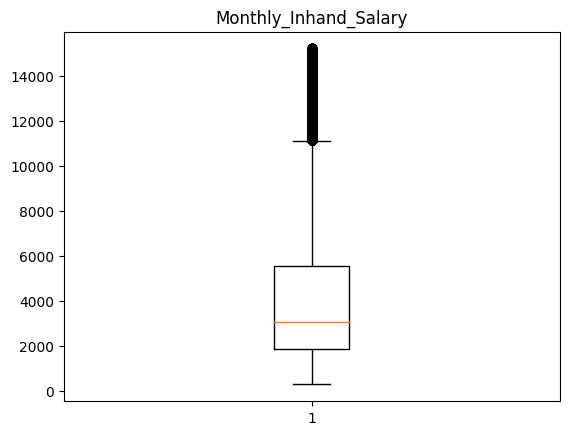

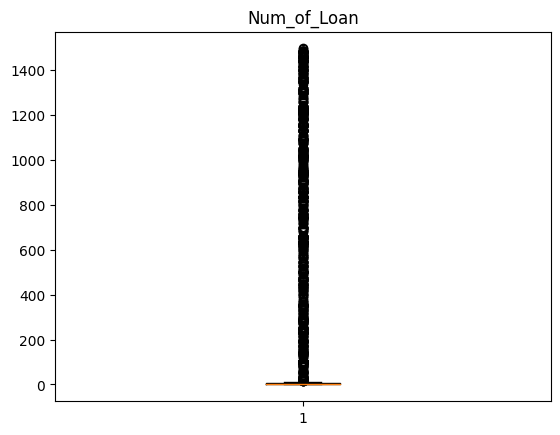

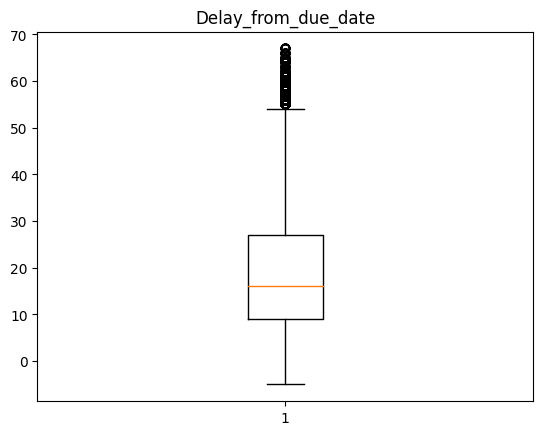

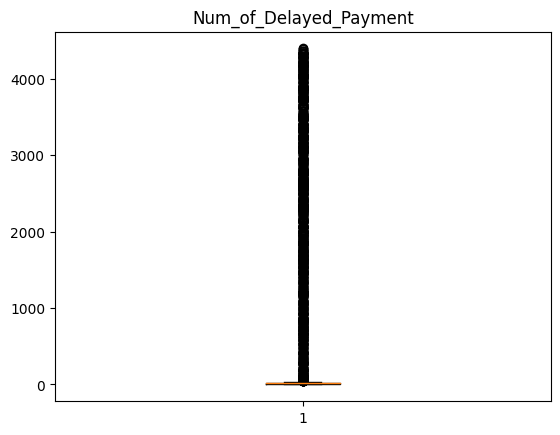

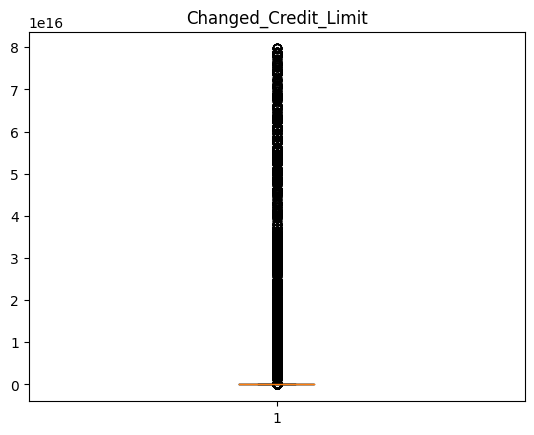

In [ ]:
for i in ['Num_Bank_Accounts','Age','Annual_Income','Monthly_Inhand_Salary','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit']:
  plt.boxplot(train_data_unsampled[i])
  plt.title(i)
  plt.show()

**Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in train_data_unsampled.columns:
  if train_data_unsampled[col].dtype=='object':
    train_data_unsampled[col] = label_encoder .fit_transform(train_data_unsampled[col].astype(str))

**Outlier Removal**

In [ ]:
import scipy.stats as stats
z=np.abs(stats.zscore(train_data_unsampled))
data_clean=train_data_unsampled[(z<3).all(axis=1)]

In [ ]:
data_clean.shape

(131188, 23)

In [ ]:
data_clean.describe()


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,131188.000000,131188.000000,1.311880e+05,131188.000000,131188.000000,131188.000000,131188.000000,131188.000000,131188.000000,131188.000000,...,131188.000000,131188.000000,131188.000000,131188.000000,131188.000000,131188.000000,1.311880e+05,131188.000000,131188.000000,131188.000000
mean,43.343652,7.537214,6.611621e+06,4000.584187,5.626582,6.676258,17.995907,7.289623,2775.385935,19.983009,...,1.726362,120814.898817,32.273985,215.795690,0.459143,252.997347,1.072046e+16,3.460454,47475.758278,1.003041
std,98.658287,4.588873,1.448252e+07,2845.971401,11.819366,18.529946,64.905516,19.263812,1995.006217,14.978135,...,1.098498,104581.748557,5.106905,118.109396,0.498330,1590.879500,1.016708e+16,2.039544,27079.538665,0.816972
min,14.000000,0.000000,7.046500e+04,303.645417,-1.000000,0.000000,1.000000,0.000000,0.000000,-5.000000,...,0.000000,12.000000,20.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,25.000000,4.000000,1.846408e+06,1835.438750,3.000000,4.000000,7.000000,2.000000,885.000000,9.000000,...,1.000000,38702.000000,28.052275,114.000000,0.000000,28.442189,3.357031e+15,2.000000,24059.750000,0.000000
50%,34.000000,8.000000,3.845871e+06,3093.745000,5.000000,5.000000,12.000000,3.000000,2775.000000,16.000000,...,2.000000,99262.000000,32.306482,205.000000,0.000000,65.222985,8.162033e+15,3.000000,47757.500000,1.000000
75%,43.000000,12.000000,8.176935e+06,5375.389375,7.000000,7.000000,20.000000,5.000000,4532.000000,27.000000,...,3.000000,162094.000000,36.494167,314.000000,1.000000,148.452544,1.437216e+16,6.000000,70919.500000,2.000000
max,2209.000000,15.000000,2.419806e+08,13332.660000,371.000000,412.000000,1499.000000,201.000000,6260.000000,65.000000,...,3.000000,462756.000000,47.578752,404.000000,1.000000,26539.000000,4.864449e+16,6.000000,91701.000000,2.000000


**Heatmap**

<Axes: >

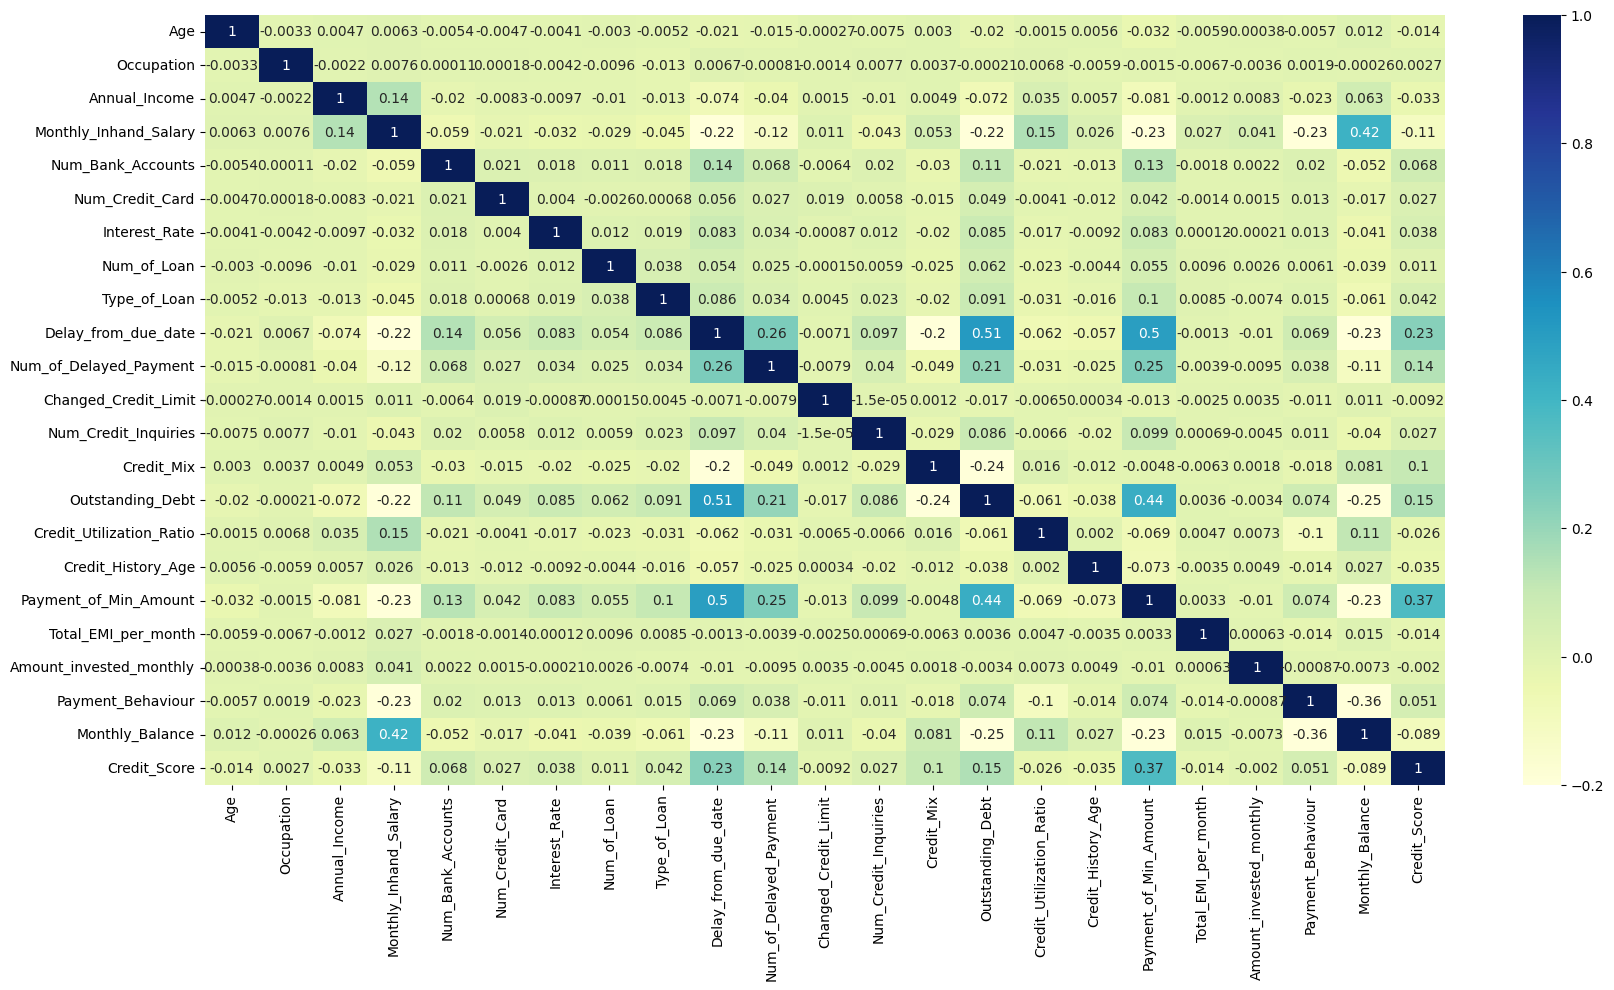

In [ ]:
corrmatrix=data_clean.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=1,cmap='YlGnBu')

In [ ]:
data_clean

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
9152,26,5,5427588,4758.990000,7,10,30,6,3465,16,...,1,456966,35.390935,64,1,192.165937,7.867231e+14,1,66739,1
33570,25,0,807946,3093.745000,7,7,23,5,3066,24,...,0,151552,23.507905,65,1,25.585426,3.500000e+15,4,17309,1
44343,22,3,1310002,1246.668333,7,5,6,5,812,6,...,3,72729,37.332404,40,1,41.177132,9.554955e+15,6,26445,1
31552,37,11,5744979,4907.482500,8,8,26,6,4187,62,...,0,399044,32.668885,363,1,278.904195,8.162033e+15,2,61194,1
82843,32,14,4344297,3748.247500,8,8,26,7,1463,58,...,1,422597,25.972762,20,1,249.964164,7.388081e+15,3,38481,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,28,1,2000288,1929.906667,10,8,29,5,4914,33,...,0,35717,28.508250,356,1,60.964772,2.139780e+16,6,91701,2
99989,28,12,2000288,1929.906667,10,8,29,5,4914,33,...,1,35717,33.359987,357,1,60.964772,7.436660e+15,0,91701,2
99990,28,1,2000288,1929.906667,10,8,29,5,4914,33,...,1,35717,25.123535,404,1,60.964772,1.732755e+15,4,91701,2
99991,29,1,2000288,1929.906667,10,8,29,5,4914,33,...,1,35717,37.140784,361,1,60.964772,3.466291e+15,1,91701,2


**Scaling**

In [ ]:
y=data_clean['Credit_Score']
x=data_clean.drop(['Credit_Score'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('f1 score is',f1_score(y_test,y_pred,average='macro'))


Accuracy is 0.633289630149099
precision is 0.6338869552080034
Recall is 0.6341373833985444
f1 score is 0.6241123523938545


In [ ]:
confusion_matrix(y_test,y_pred)

array([[9165,  341, 1315],
       [1975, 6751, 2308],
       [3680, 2408, 4854]])

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)
    

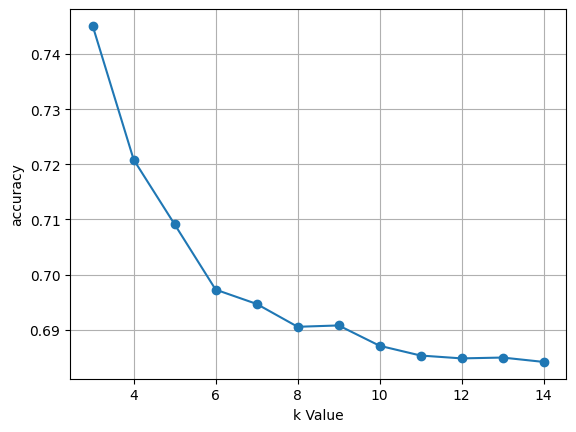

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=1)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 2])

In [ ]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('f1 score is',f1_score(y_test,y_pred,average='macro'))
confusion_matrix(y_test,y_pred)      

Accuracy is 0.7837912004146721
precision is 0.7839947814080636
Recall is 0.7841095600721205
f1 score is 0.7765747500048744


array([[9969,  176,  676],
       [ 557, 9390, 1087],
       [2366, 2229, 6347]])

**svm**

In [ ]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=svmclf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.6211543738756593


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)


In [ ]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is:  0.8099826203616184
[[9528  229 1064]
 [ 192 9336 1506]
 [1428 1813 7701]]


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=rf_clf.predict(x_test)
print('Accuracy is:',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.900936061225112
[[10580    17   224]
 [   67 10553   414]
 [ 1098  1429  8415]]


In [ ]:
y_pred

array([0, 2, 1, ..., 1, 0, 2])

**HyperParameter Tuning**

In [ ]:
rf_clf=RandomForestClassifier(n_estimators=65,max_depth=60,criterion='entropy',min_samples_split=4,random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=60, min_samples_split=4,
                       n_estimators=65, random_state=42)

In [ ]:
y_pred=rf_clf.predict(x_test)
print('Accuracy is:',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.8952648108058664
[[10500    16   305]
 [   74 10508   452]
 [ 1129  1459  8354]]


**Test Data Preprocessing**

In [ ]:
test_data=pd.read_csv('/content/test.csv')
test_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


**Test Data EDA**

In [ ]:
test_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [ ]:
test_data.shape

(50000, 27)

In [ ]:
test_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


In [ ]:
test_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [ ]:
l=test_data.drop([ 'ID','Age','Occupation','Month','Name','SSN',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],axis=1)

In [ ]:
l

,Customer_ID
0,CUS_0xd40
1,CUS_0xd40
2,CUS_0xd40
3,CUS_0xd40
4,CUS_0x21b1
...,...
49995,CUS_0x8600
49996,CUS_0x942c
49997,CUS_0x942c
49998,CUS_0x942c


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [ ]:
test_data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

In [ ]:
test_data.nunique()

ID                          50000
Customer_ID                 12500
Month                           4
Name                        10139
Age                           976
SSN                         12501
Occupation                     16
Annual_Income               16121
Monthly_Inhand_Salary       12793
Num_Bank_Accounts             540
Num_Credit_Card               819
Interest_Rate                 945
Num_of_Loan                   263
Type_of_Loan                 6260
Delay_from_due_date            73
Num_of_Delayed_Payment        443
Changed_Credit_Limit         3927
Num_Credit_Inquiries          750
Credit_Mix                      4
Outstanding_Debt            12685
Credit_Utilization_Ratio    50000
Credit_History_Age            399
Payment_of_Min_Amount           3
Total_EMI_per_month         13144
Amount_invested_monthly     45450
Payment_Behaviour               7
Monthly_Balance             49433
dtype: int64

**Count Plots**

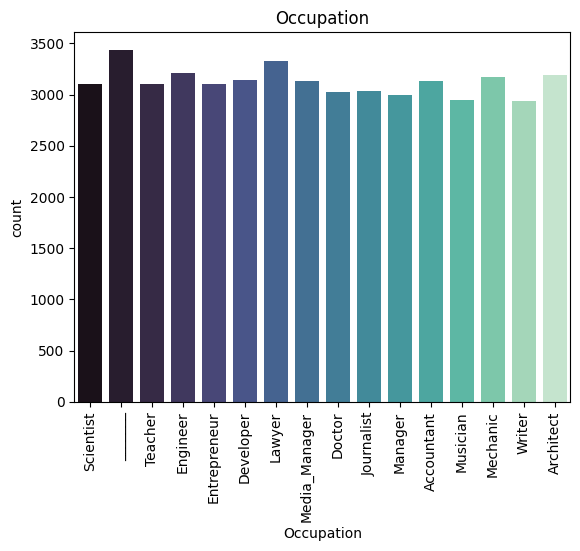

In [ ]:
sns.countplot(x=test_data['Occupation'],palette='mako')
plt.title('Occupation')
plt.xticks(rotation=90)
plt.show()

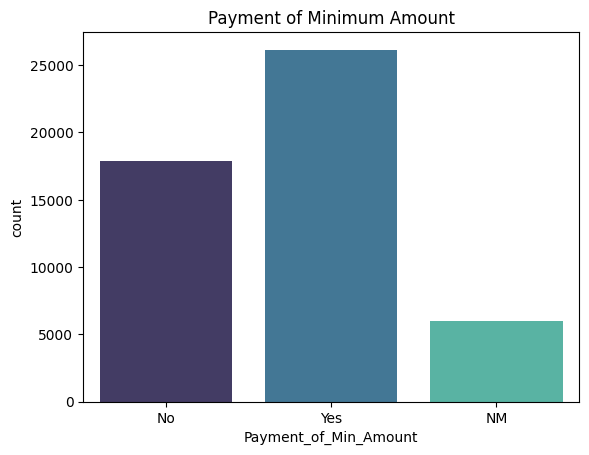

In [ ]:
sns.countplot(x=test_data['Payment_of_Min_Amount'],palette='mako')
plt.title('Payment of Minimum Amount')
plt.show()

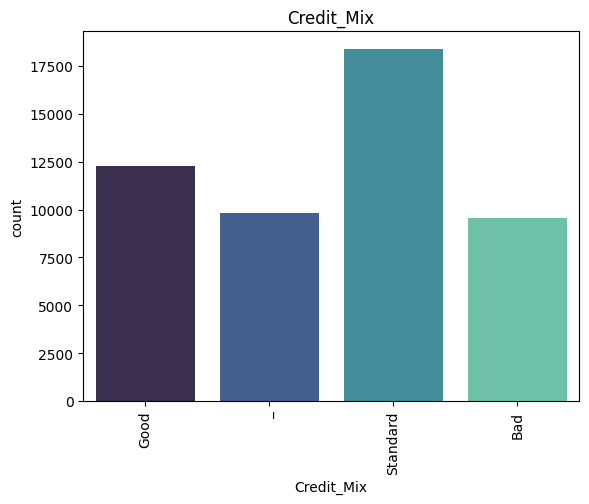

In [ ]:
sns.countplot(x=test_data['Credit_Mix'],palette='mako')
plt.title('Credit_Mix')
plt.xticks(rotation=90)
plt.show()

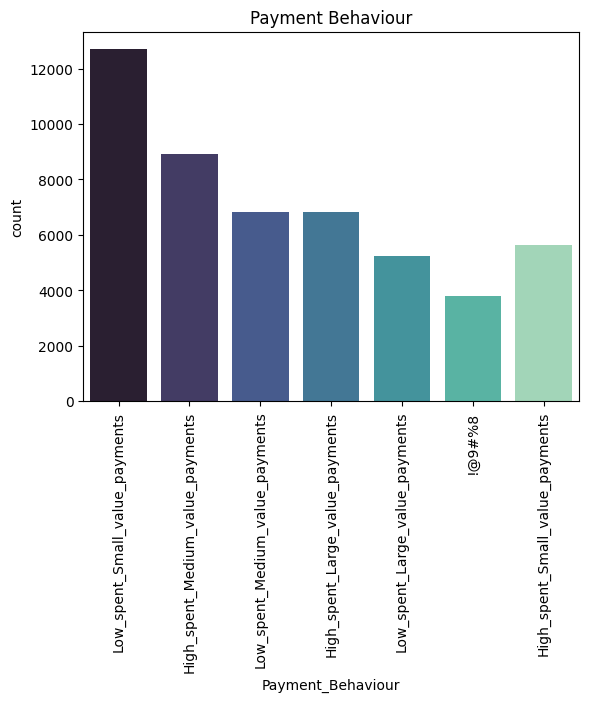

In [ ]:
sns.countplot(x=test_data['Payment_Behaviour'],palette='mako')
plt.title('Payment Behaviour')
plt.xticks(rotation=90)
plt.show()

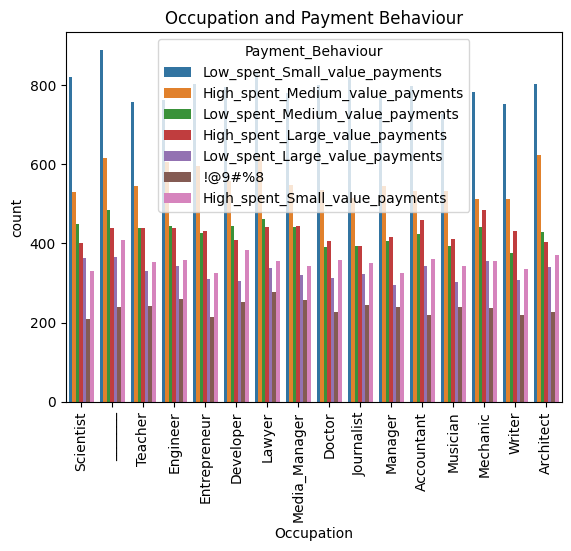

In [ ]:
sns.countplot(data=test_data,x='Occupation',hue='Payment_Behaviour')
plt.title('Occupation and Payment Behaviour')
plt.xticks(rotation=90)
plt.show()


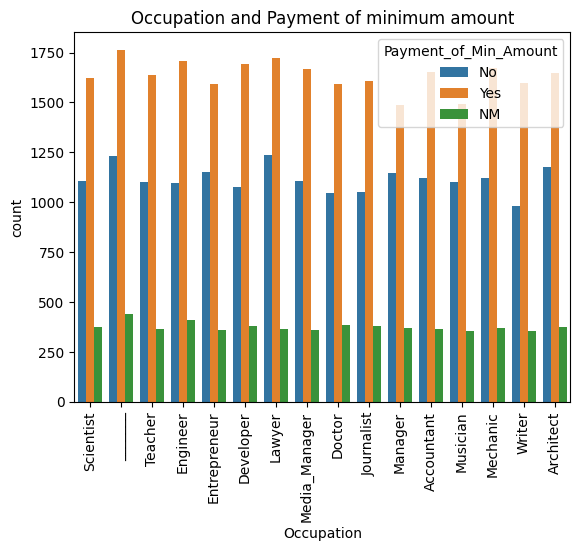

In [ ]:
sns.countplot(data=test_data,x='Occupation',hue='Payment_of_Min_Amount')
plt.title('Occupation and Payment of minimum amount')
plt.xticks(rotation=90)
plt.show()

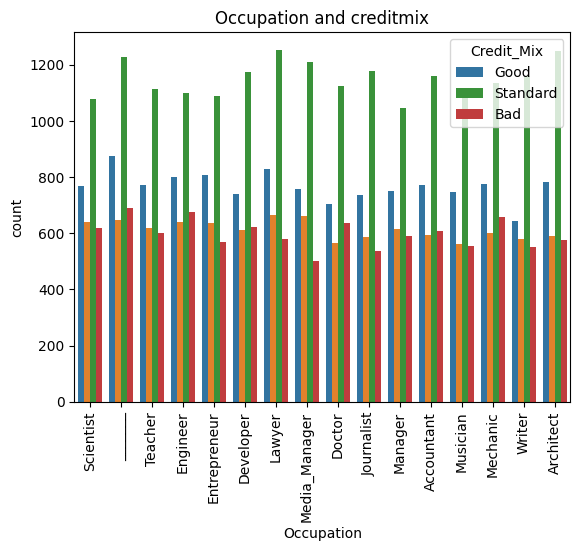

In [ ]:
sns.countplot(data=test_data,x='Occupation',hue='Credit_Mix')
plt.title('Occupation and creditmix')
plt.xticks(rotation=90)
plt.show()

**Histogram**

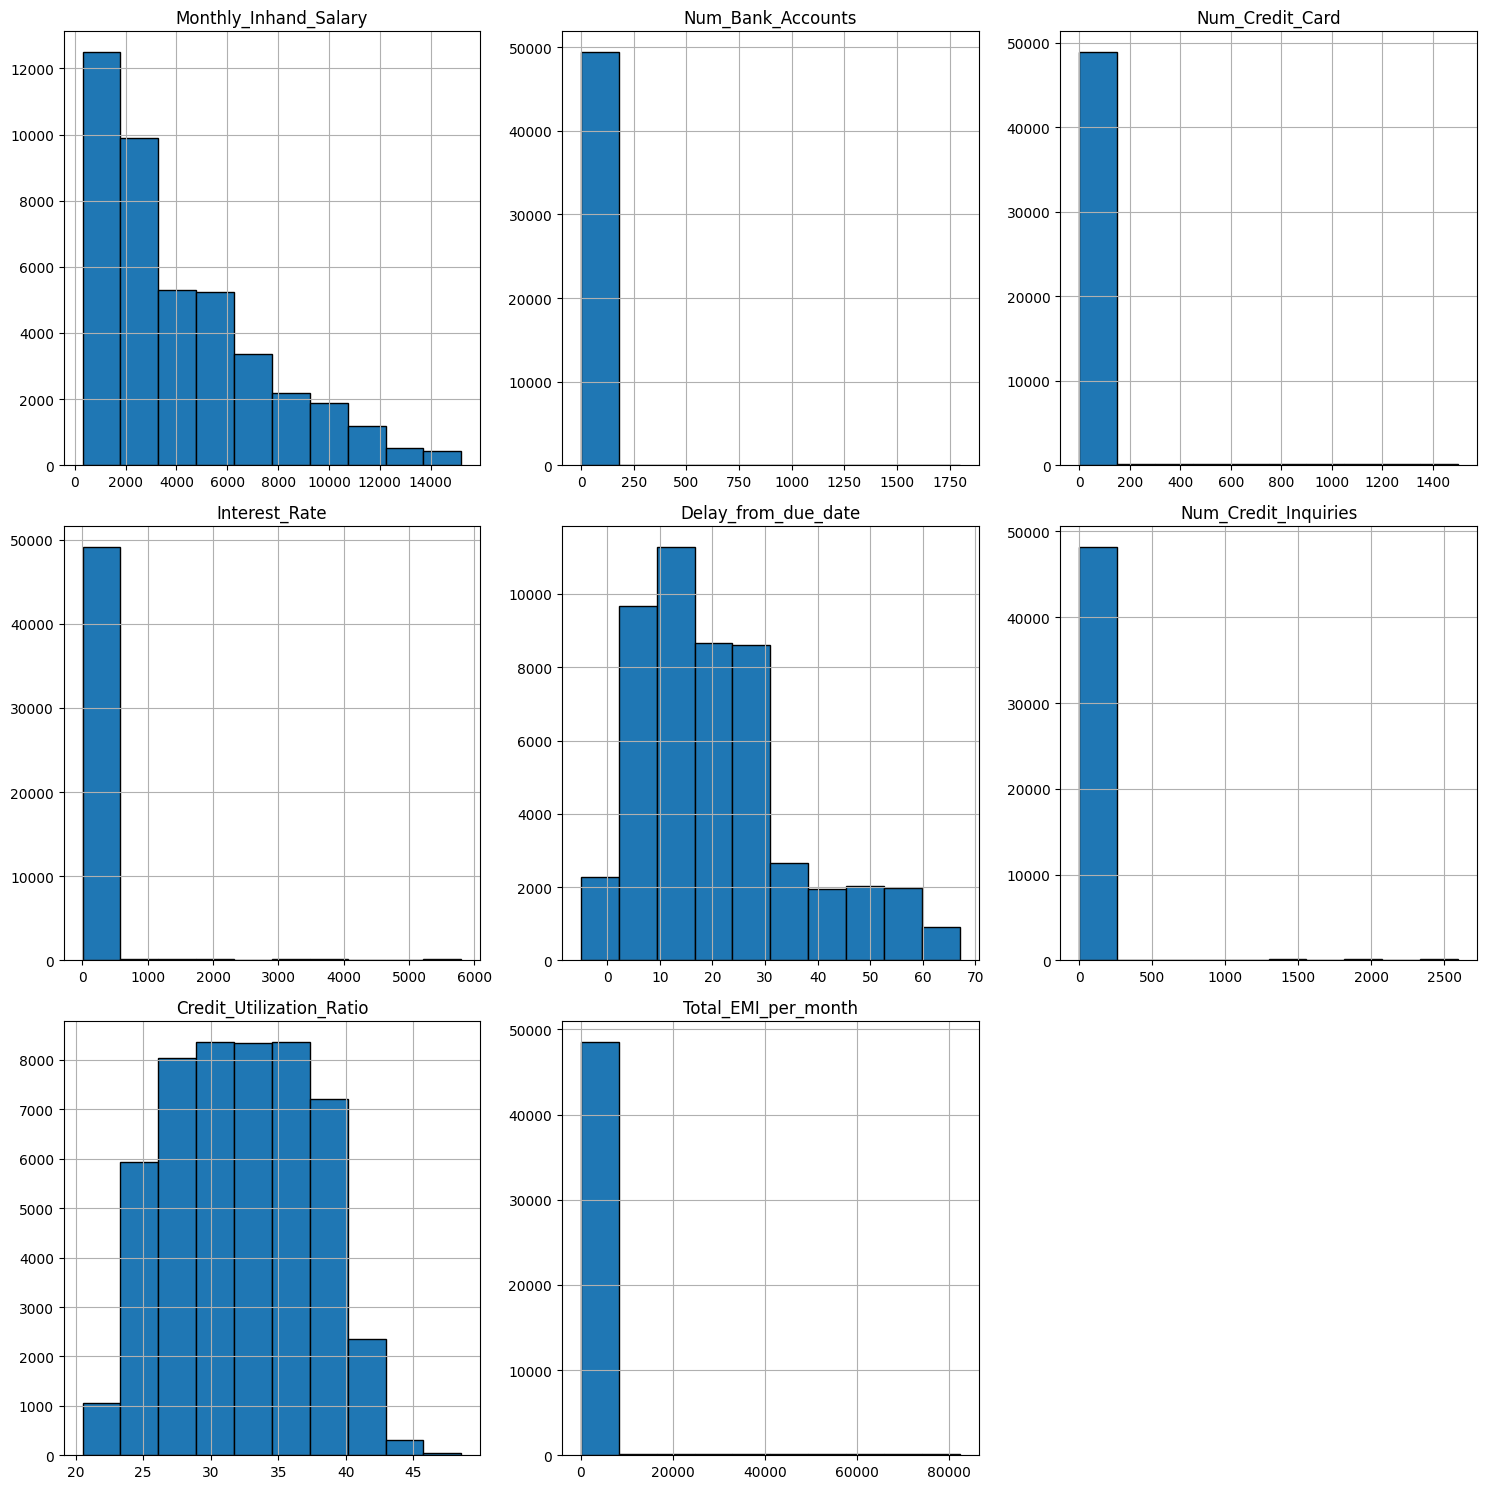

In [ ]:
test_data.hist(figsize=(15,15),edgecolor='black')
plt.tight_layout()
plt.show()

**Preprocessing**

**Converting objects to float**

In [ ]:
test_data['Age']=test_data['Age'].str.replace(r'\D','')
test_data['Annual_Income']=test_data['Annual_Income'].str.replace(r'\D','')
test_data['Num_of_Loan']=test_data['Num_of_Loan'].str.replace(r'\D','')
test_data['Num_of_Delayed_Payment']=test_data['Num_of_Delayed_Payment'].str.replace(r'\D','')
test_data['Changed_Credit_Limit']=test_data['Changed_Credit_Limit'].str.replace(r'\D','')
test_data['Amount_invested_monthly']=test_data['Amount_invested_monthly'].str.replace(r'\D','')
test_data['Outstanding_Debt']=test_data['Outstanding_Debt'].str.replace(r'\D','')
test_data['Monthly_Balance']=test_data['Monthly_Balance'].str.replace(r'\D','')

<ipython-input-143-eeec81b3bfc9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['Age']=test_data['Age'].str.replace(r'\D','')
<ipython-input-143-eeec81b3bfc9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['Annual_Income']=test_data['Annual_Income'].str.replace(r'\D','')
<ipython-input-143-eeec81b3bfc9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['Num_of_Loan']=test_data['Num_of_Loan'].str.replace(r'\D','')
<ipython-input-143-eeec81b3bfc9>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['Num_of_Delayed_Payment']=test_data['Num_of_Delayed_Payment'].str.replace(r'\D','')
<ipython-input-143-eeec81b3bfc9>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['Changed_Credit_Limit']=test_dat

In [ ]:
test_data['Age'] = pd.to_numeric(test_data['Age'])
test_data['Annual_Income'] =pd.to_numeric(test_data['Annual_Income'])
test_data['Num_of_Loan'] =pd.to_numeric(test_data['Num_of_Loan'])
test_data['Num_of_Delayed_Payment'] =pd.to_numeric(test_data['Num_of_Delayed_Payment'])
test_data['Changed_Credit_Limit'] = pd.to_numeric(test_data['Changed_Credit_Limit'])
test_data['Amount_invested_monthly'] = pd.to_numeric(test_data['Amount_invested_monthly'])
test_data['Outstanding_Debt'] = pd.to_numeric(test_data['Outstanding_Debt'])

In [ ]:
test_data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           int64
SSN                          object
Occupation                   object
Annual_Income                 int64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt              int64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

**Fixing unknown values**

In [ ]:
test_data['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [ ]:
test_data['Occupation'].replace('_______','Others',inplace=True)
test_data['Occupation'].unique()

array(['Scientist', 'Others', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [ ]:
test_data.drop(['ID','Month','Name','SSN'],axis=1,inplace=True)

In [ ]:
test_data.drop(['Customer_ID'],axis=1,inplace=True)

In [ ]:
test_data['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [ ]:
test_data['Payment_of_Min_Amount'].value_counts()

Yes    26158
No     23842
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
test_data['Payment_Behaviour'].unique()

array(['Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments', '!@9#%8',
       'High_spent_Small_value_payments'], dtype=object)

In [ ]:
test_data['Payment_Behaviour'].replace('!@9#%8',np.nan,inplace=True)
test_data['Payment_Behaviour'].unique()

array(['Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments', nan,
       'High_spent_Small_value_payments'], dtype=object)

In [ ]:
test_data['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
Name: Payment_Behaviour, dtype: int64

In [ ]:
test_data['Credit_Mix'].unique()

array(['Good', '_', 'Standard', 'Bad'], dtype=object)

In [ ]:
test_data['Credit_Mix'].replace('_',np.nan,inplace=True)
test_data['Credit_Mix'].value_counts()

Standard    18379
Good        12260
Bad          9556
Name: Credit_Mix, dtype: int64

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  int64  
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  int64  
 3   Monthly_Inhand_Salary     42502 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  int64  
 8   Type_of_Loan              44296 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  float64
 11  Changed_Credit_Limit      48941 non-null  float64
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                40195 non-null  object 
 14  Outsta

**Missing Value Handling**

In [ ]:
test_data.isna().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit        1059
Num_Credit_Inquiries        1035
Credit_Mix                  9805
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour           3800
Monthly_Balance              562
dtype: int64

In [ ]:
for i in ['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly']:
  test_data[i]=test_data[i].fillna(test_data[i].median())

In [ ]:
for i in ['Type_of_Loan','Payment_Behaviour','Credit_History_Age','Credit_Mix','Monthly_Balance']:
  test_data[i]=test_data[i].fillna(test_data[i].mode)

In [ ]:
test_data.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [ ]:
test_data.shape

(50000, 22)

**Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in test_data.columns:
  if test_data[col].dtype=='object':
    test_data[col] = label_encoder .fit_transform(test_data[col].astype(str))

**Heatmap**

<Axes: >

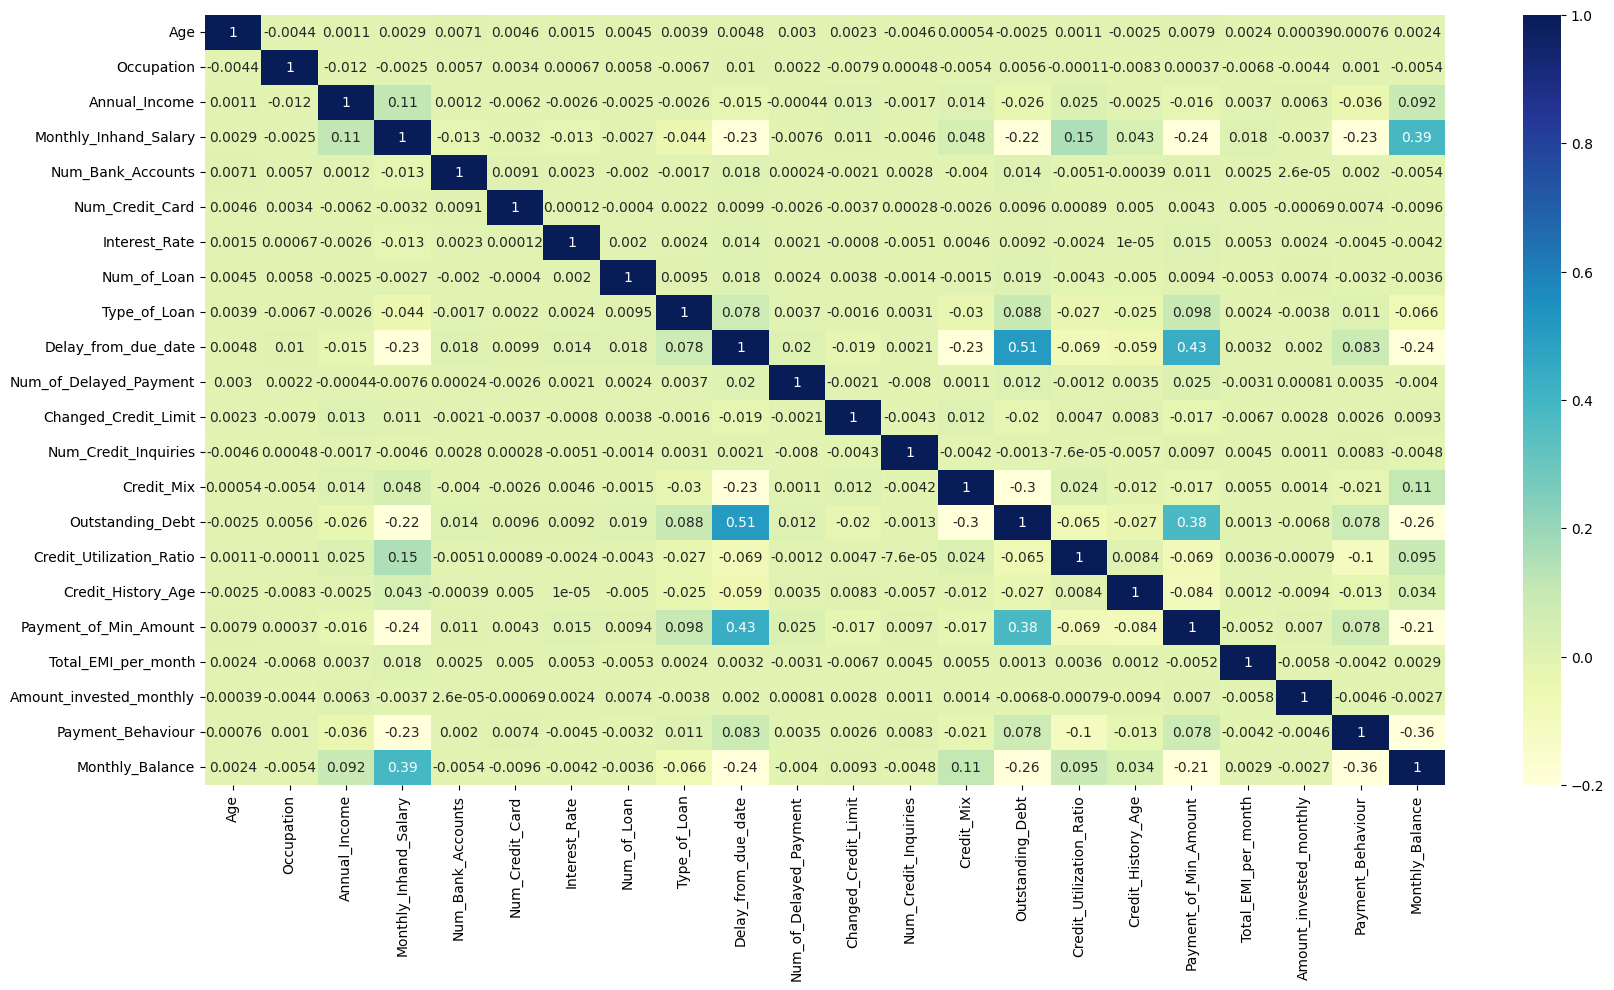

In [ ]:
corrmatrix=test_data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=1,cmap='YlGnBu')

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
test_data_scaled=scaler.fit_transform(test_data)
test_data_scaled

array([[-0.14155828,  1.20178398, -0.13939215, ...,  0.95271912,
         1.24906823, -1.50405513],
       [-0.14008363,  1.20178398, -0.13939215, ...,  0.77443267,
        -0.71793738,  0.24782548],
       [-0.14008363,  1.20178398, -0.13939215, ...,  0.23589854,
         0.75731683, -0.92233622],
       ...,
       [-0.13860898,  0.33188732, -0.13939215, ..., -0.9659864 ,
         0.26556543,  0.14156058],
       [-0.13860898,  0.33188732, -0.13939215, ..., -0.17465437,
        -0.22618598,  0.84895351],
       [-0.13860898,  0.33188732, -0.13939215, ...,  0.82149228,
         0.75731683,  0.23881411]])

**Predictions using Random Forest**

In [ ]:
y_pred=rf_clf.predict(test_data_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 2])

In [ ]:
y_pred=pd.DataFrame(y_pred,columns=['Credit Score'])

In [ ]:
y_pred.shape

(50000, 1)

In [ ]:
Predictions=pd.concat([l,y_pred],axis=1)
Predictions

,Customer_ID,Credit Score
0,CUS_0xd40,0
1,CUS_0xd40,0
2,CUS_0xd40,0
3,CUS_0xd40,0
4,CUS_0x21b1,0
...,...,...
49995,CUS_0x8600,2
49996,CUS_0x942c,0
49997,CUS_0x942c,0
49998,CUS_0x942c,0
